# Capstone1 Proposal

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
start_df=pd.read_csv('/Users/vnguyenair/Desktop/loan.csv',low_memory=False)

In [4]:
start_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260668 entries, 0 to 2260667
Columns: 145 entries, id to settlement_term
dtypes: float64(105), int64(4), object(36)
memory usage: 2.4+ GB


In [5]:
start_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000.0,60 months,18.94,777.23,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,4000,4000,4000.0,36 months,18.94,146.51,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,30000,30000,30000.0,60 months,16.14,731.78,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
Done_df=start_df[start_df.loan_status!='Current']

In [10]:
Done_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
100,NaN,NaN,30000,30000,30000.0,36 months,22.35,1151.16,D,D5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
152,NaN,NaN,40000,40000,40000.0,60 months,16.14,975.71,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
170,NaN,NaN,20000,20000,20000.0,36 months,7.56,622.68,A,A3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
186,NaN,NaN,4500,4500,4500.0,36 months,11.31,147.99,B,B3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
215,NaN,NaN,8425,8425,8425.0,36 months,27.27,345.18,E,E5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
Done_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1340973 entries, 100 to 2260664
Columns: 145 entries, id to settlement_term
dtypes: float64(105), int64(4), object(36)
memory usage: 1.5+ GB


In [20]:
Done_df.loan_status.value_counts()

Fully Paid                                             1041952
Charged Off                                             261655
Late (31-120 days)                                       21897
In Grace Period                                           8952
Late (16-30 days)                                         3737
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     31
Name: loan_status, dtype: int64

In [21]:
Done_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=145)

In [41]:
interested_cols=['addr_state','annual_inc','annual_inc_joint','application_type','delinq_2yrs','dti','dti_joint','emp_length',
                'loan_amnt','home_ownership','int_rate','open_acc','tot_cur_bal','acc_now_delinq',
                'grade','sub_grade','loan_status']

In [42]:
fil_df=Done_df.loc[:,interested_cols]

In [43]:
fil_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1340973 entries, 100 to 2260664
Data columns (total 17 columns):
addr_state          1340973 non-null object
annual_inc          1340969 non-null float64
annual_inc_joint    26929 non-null float64
application_type    1340973 non-null object
delinq_2yrs         1340944 non-null float64
dti                 1340619 non-null float64
dti_joint           26927 non-null float64
emp_length          1262545 non-null object
loan_amnt           1340973 non-null int64
home_ownership      1340973 non-null object
int_rate            1340973 non-null float64
open_acc            1340944 non-null float64
tot_cur_bal         1270697 non-null float64
acc_now_delinq      1340944 non-null float64
grade               1340973 non-null object
sub_grade           1340973 non-null object
loan_status         1340973 non-null object
dtypes: float64(9), int64(1), object(7)
memory usage: 184.2+ MB


In [44]:
fil_df.to_csv('Data.csv')

In [46]:
loan_list=[1 if i=='Fully Paid' else 0 for i in fil_df['loan_status']]
fil_df['decision'] = loan_list
fil_df['decision'].value_counts()


1    1041952
0     299021
Name: decision, dtype: int64

Text(0, 0.5, 'Data type')

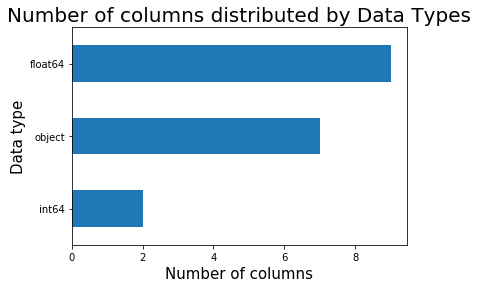

In [47]:
fil_df.dtypes.value_counts().sort_values().plot(kind='barh')
plt.title('Number of columns distributed by Data Types',fontsize=20)
plt.xlabel('Number of columns',fontsize=15)
plt.ylabel('Data type',fontsize=15)

In [48]:
fil_df.describe()

,annual_inc,annual_inc_joint,delinq_2yrs,dti,dti_joint,loan_amnt,int_rate,open_acc,tot_cur_bal,acc_now_delinq,decision
count,1.340969e+06,2.692900e+04,1.340944e+06,1.340619e+06,26927.000000,1.340973e+06,1.340973e+06,1.340944e+06,1.270697e+06,1.340944e+06,1.340973e+06
mean,7.619619e+04,1.171562e+05,3.189499e-01,1.829820e+01,19.064739,1.447239e+04,1.331854e+01,1.159113e+01,1.408983e+05,5.038242e-03,7.770119e-01
std,7.047926e+04,5.946941e+04,8.799063e-01,1.116129e+01,7.748603,8.735345e+03,4.785973e+00,5.478261e+00,1.573075e+05,7.710409e-02,4.162506e-01
min,0.000000e+00,1.100000e+04,0.000000e+00,-1.000000e+00,0.000000,5.000000e+02,5.310000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.576000e+04,8.000000e+04,0.000000e+00,1.180000e+01,13.430000,8.000000e+03,9.760000e+00,8.000000e+00,2.940300e+04,0.000000e+00,1.000000e+00
50%,6.500000e+04,1.060000e+05,0.000000e+00,1.763000e+01,18.700000,1.200000e+04,1.279000e+01,1.100000e+01,7.984300e+04,0.000000e+00,1.000000e+00
75%,9.000000e+04,1.400000e+05,0.000000e+00,2.408000e+01,24.375000,2.000000e+04,1.602000e+01,1.400000e+01,2.104040e+05,0.000000e+00,1.000000e+00
max,1.099920e+07,1.837000e+06,3.900000e+01,9.990000e+02,69.490000,4.000000e+04,3.099000e+01,9.000000e+01,8.000078e+06,1.400000e+01,1.000000e+00


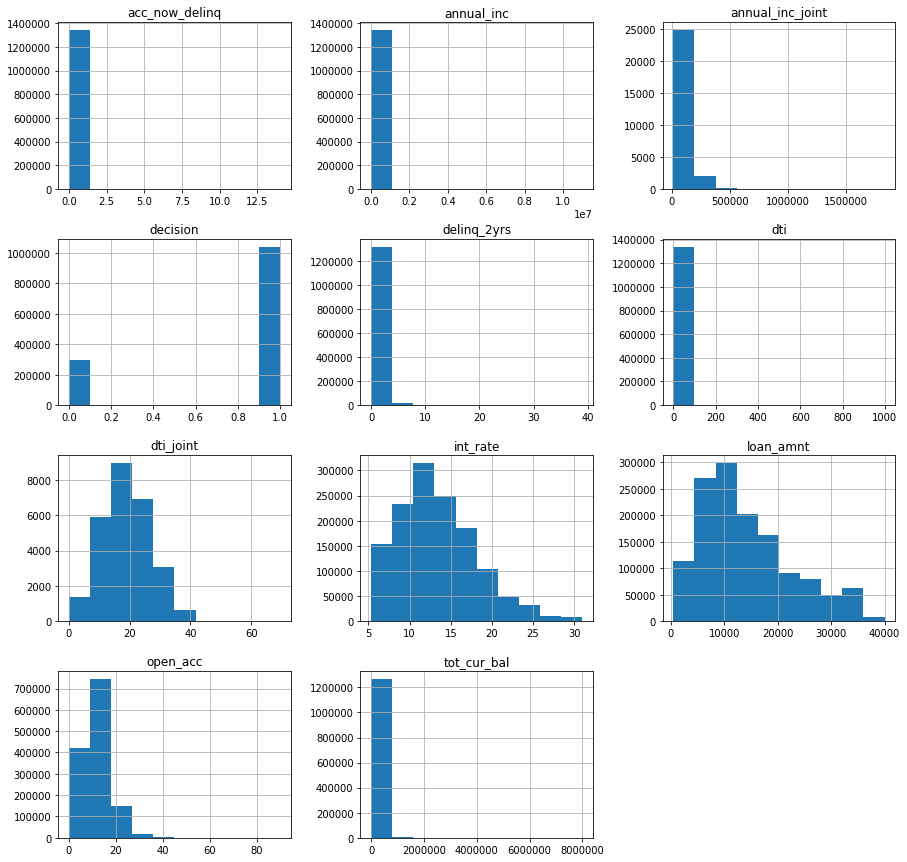

<Figure size 432x288 with 0 Axes>

In [54]:
fil_df.hist(figsize=(15,15))
plt.figure()
plt.show()

In [56]:
fil_df['addr_state'].value_counts()

CA    195921
NY    109934
TX    109836
FL     95651
IL     51343
NJ     48335
PA     45441
OH     43470
GA     43280
VA     37931
NC     37618
MI     35090
AZ     32536
MD     31357
MA     30901
CO     29485
WA     28993
MN     23827
IN     21543
MO     21211
TN     20261
NV     20127
CT     19696
WI     17694
AL     16633
OR     16311
SC     15878
LA     15491
KY     12777
OK     12201
KS     11142
AR     10013
UT      9982
NM      7354
HI      6746
MS      6635
NH      6412
RI      5838
WV      4824
MT      3781
DE      3776
NE      3563
DC      3460
AK      3180
WY      2902
SD      2750
VT      2625
ME      1995
ID      1631
ND      1578
IA        14
Name: addr_state, dtype: int64

In [57]:
fil_df['application_type'].value_counts()

Individual    1314044
Joint App       26929
Name: application_type, dtype: int64

In [58]:
fil_df['emp_length'].value_counts()

10+ years    439791
2 years      121342
< 1 year     108194
3 years      107330
1 year        88431
5 years       83932
4 years       80360
6 years       62592
8 years       60501
7 years       59450
9 years       50622
Name: emp_length, dtype: int64

In [59]:
fil_df['home_ownership'].value_counts()

MORTGAGE    662056
RENT        534071
OWN         144321
ANY            290
OTHER          182
NONE            53
Name: home_ownership, dtype: int64

In [60]:
fil_df['grade'].value_counts()

B    388102
C    382727
A    228592
D    203758
E     95465
F     32794
G      9535
Name: grade, dtype: int64

In [61]:
fil_df['sub_grade'].value_counts()

C1    85187
B4    82411
B5    81770
B3    80861
C2    79228
C3    75208
C4    74933
B2    72977
B1    70083
C5    68171
A5    62829
D1    51803
A4    51105
D2    45293
A1    41509
D3    39953
A3    37030
A2    36119
D4    36118
D5    30591
E1    24025
E2    21730
E3    18766
E4    16045
E5    14899
F1    10165
F2     7334
F3     6249
F4     4984
F5     4062
G1     3086
G2     2202
G3     1674
G4     1363
G5     1210
Name: sub_grade, dtype: int64